In [1]:
## import libraries
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, TimeDistributed, RepeatVector, Bidirectional, CuDNNLSTM
import matplotlib.pyplot as plt
#import os
import tensorflow as tf
from keras.regularizers import l2

Using TensorFlow backend.
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lab606a/.virtualenvs/keras/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lab606a/.virtualenvs

In [2]:
# set GPU memory
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
n_step = 9

In [4]:
def split(data, depth):
    dataset = data
    depth = depth
    X = np.zeros([int(depth), n_step, 3])
    Y = np.zeros([int(depth), n_step, 3])
    c = 0
    d = 0
    
    for i in range(int(depth)):
        for j in range(n_step):
            if d < dataset.shape[0]:
                X[i,j,:] = dataset[d, c:c+3]
                Y[i,j,:] = dataset[d, (c+3*n_step):(c+3*n_step+3)]
                
                if ((c+3*n_step+3) != (dataset.shape[1])):
                    c +=3
                else:
                    c = 0
                    d += 1
        if (c-3) > 0:
            c = (c - 3*n_step + 3)
        else:
            c = c
            
    return X, Y

In [5]:
dataset = pd.read_csv('/home/lab606a/Documents/20200415/not_fixed/datasets/test.csv', header=None)
dataset = dataset.fillna(0)
dataset = np.array(dataset)
dataset.shape

(1642, 147)

In [6]:
maxlen_train = dataset.shape[1]+(n_step-1)*3
maxlen_train

171

In [7]:
dataset = sequence.pad_sequences(dataset, maxlen=maxlen_train, padding='post', dtype='float32')
dataset.shape

(1642, 171)

In [8]:
depth_train = (int(dataset.shape[1]/3)+1-n_step-n_step)*dataset.shape[0] # (all_balls + 1 - input_balls - output_balls)*n_rows

In [9]:
x_train, y_train = split(data=dataset, depth=depth_train)

In [10]:
model = Sequential()
model.add(CuDNNLSTM(128, input_shape=(x_train.shape[1], x_train.shape[2]), kernel_regularizer=l2(0.01)))
model.add(RepeatVector(x_train.shape[1]))
model.add(CuDNNLSTM(128, return_sequences=True ,activity_regularizer=l2(0.01)))
model.add(TimeDistributed(Dense(3)))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_1 (CuDNNLSTM)     (None, 128)               68096     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 9, 128)            0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 9, 128)            132096    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 9, 3)              387       
Total params: 200,579
Trainable params: 200,579
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(x_train, y_train, batch_size=2000, epochs=1000, shuffle=True)

Epoch 1/1000
65680/65680 [==============================] - 0s 6us/step - loss: 5.5691 - acc: 0.7956
Epoch 2/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.8938 - acc: 0.8023
Epoch 3/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.4206 - acc: 0.8087
Epoch 4/1000
65680/65680 [==============================] - 0s 6us/step - loss: 4.4332 - acc: 0.7977
Epoch 5/1000
65680/65680 [==============================] - 0s 6us/step - loss: 4.3246 - acc: 0.8061
Epoch 6/1000
65680/65680 [==============================] - 0s 5us/step - loss: 4.2051 - acc: 0.8104
Epoch 7/1000
65680/65680 [==============================] - 0s 6us/step - loss: 4.0412 - acc: 0.8569
Epoch 8/1000
65680/65680 [==============================] - 0s 6us/step - loss: 4.0103 - acc: 0.8783
Epoch 9/1000
65680/65680 [==============================] - 0s 7us/step - loss: 4.0439 - acc: 0.8776
Epoch 10/1000
65680/65680 [==============================] - 0s 6us/step - loss: 4.0044 - a

65680/65680 [==============================] - 1s 9us/step - loss: 3.9644 - acc: 0.8606
Epoch 82/1000
65680/65680 [==============================] - 0s 7us/step - loss: 3.9866 - acc: 0.8693
Epoch 83/1000
65680/65680 [==============================] - 1s 9us/step - loss: 4.0544 - acc: 0.8336
Epoch 84/1000
65680/65680 [==============================] - 1s 9us/step - loss: 4.0212 - acc: 0.8403
Epoch 85/1000
65680/65680 [==============================] - 0s 7us/step - loss: 4.1012 - acc: 0.8408
Epoch 86/1000
65680/65680 [==============================] - 0s 7us/step - loss: 4.3168 - acc: 0.8121
Epoch 87/1000
65680/65680 [==============================] - 0s 5us/step - loss: 4.1539 - acc: 0.8114
Epoch 88/1000
65680/65680 [==============================] - 0s 7us/step - loss: 4.3001 - acc: 0.8074
Epoch 89/1000
65680/65680 [==============================] - 0s 6us/step - loss: 4.2149 - acc: 0.8441
Epoch 90/1000
65680/65680 [==============================] - 1s 9us/step - loss: 4.2444 - acc: 0

65680/65680 [==============================] - 0s 5us/step - loss: 4.8698 - acc: 0.8124
Epoch 161/1000
65680/65680 [==============================] - 0s 6us/step - loss: 4.7701 - acc: 0.8093
Epoch 162/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.8095 - acc: 0.8081
Epoch 163/1000
65680/65680 [==============================] - 1s 9us/step - loss: 4.4391 - acc: 0.7816
Epoch 164/1000
65680/65680 [==============================] - 1s 9us/step - loss: 4.2584 - acc: 0.8231
Epoch 165/1000
65680/65680 [==============================] - 0s 6us/step - loss: 4.4163 - acc: 0.7981
Epoch 166/1000
65680/65680 [==============================] - 1s 9us/step - loss: 4.9304 - acc: 0.8087
Epoch 167/1000
65680/65680 [==============================] - 0s 7us/step - loss: 4.5323 - acc: 0.8058
Epoch 168/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.0384 - acc: 0.8294
Epoch 169/1000
65680/65680 [==============================] - 0s 4us/step - loss: 3.9310

65680/65680 [==============================] - 0s 4us/step - loss: 5.2179 - acc: 0.7855
Epoch 240/1000
65680/65680 [==============================] - 0s 4us/step - loss: 5.7104 - acc: 0.7911
Epoch 241/1000
65680/65680 [==============================] - 0s 4us/step - loss: 5.7503 - acc: 0.7826
Epoch 242/1000
65680/65680 [==============================] - 0s 4us/step - loss: 5.4450 - acc: 0.7917
Epoch 243/1000
65680/65680 [==============================] - 0s 4us/step - loss: 4.7455 - acc: 0.8050
Epoch 244/1000
65680/65680 [==============================] - 0s 4us/step - loss: 4.4069 - acc: 0.8000
Epoch 245/1000
65680/65680 [==============================] - 0s 8us/step - loss: 4.0865 - acc: 0.7800
Epoch 246/1000
65680/65680 [==============================] - 0s 6us/step - loss: 3.9699 - acc: 0.8192
Epoch 247/1000
65680/65680 [==============================] - 0s 5us/step - loss: 3.9362 - acc: 0.8119
Epoch 248/1000
65680/65680 [==============================] - 0s 7us/step - loss: 3.9992

65680/65680 [==============================] - 0s 5us/step - loss: 5.0936 - acc: 0.7883
Epoch 319/1000
65680/65680 [==============================] - 0s 4us/step - loss: 4.4052 - acc: 0.8109
Epoch 320/1000
65680/65680 [==============================] - 0s 4us/step - loss: 4.1276 - acc: 0.7999
Epoch 321/1000
65680/65680 [==============================] - 0s 4us/step - loss: 3.9677 - acc: 0.8181
Epoch 322/1000
65680/65680 [==============================] - 0s 4us/step - loss: 4.0264 - acc: 0.7996
Epoch 323/1000
65680/65680 [==============================] - 0s 4us/step - loss: 3.8813 - acc: 0.8192
Epoch 324/1000
65680/65680 [==============================] - 0s 4us/step - loss: 3.8598 - acc: 0.8245
Epoch 325/1000
65680/65680 [==============================] - 0s 4us/step - loss: 3.7092 - acc: 0.8489
Epoch 326/1000
65680/65680 [==============================] - 0s 4us/step - loss: 3.6914 - acc: 0.8625
Epoch 327/1000
65680/65680 [==============================] - 0s 7us/step - loss: 3.6696

65680/65680 [==============================] - 0s 4us/step - loss: 3.7457 - acc: 0.8682
Epoch 398/1000
65680/65680 [==============================] - 0s 4us/step - loss: 3.6757 - acc: 0.8322
Epoch 399/1000
65680/65680 [==============================] - 0s 5us/step - loss: 3.6119 - acc: 0.8479
Epoch 400/1000
65680/65680 [==============================] - 0s 6us/step - loss: 3.7384 - acc: 0.8747
Epoch 401/1000
65680/65680 [==============================] - 0s 6us/step - loss: 3.7110 - acc: 0.8707
Epoch 402/1000
65680/65680 [==============================] - 0s 5us/step - loss: 3.6229 - acc: 0.8725
Epoch 403/1000
65680/65680 [==============================] - 0s 5us/step - loss: 3.6353 - acc: 0.8593
Epoch 404/1000
65680/65680 [==============================] - 0s 4us/step - loss: 3.6269 - acc: 0.8788
Epoch 405/1000
65680/65680 [==============================] - 0s 4us/step - loss: 3.6233 - acc: 0.8661
Epoch 406/1000
65680/65680 [==============================] - 0s 4us/step - loss: 3.8912

65680/65680 [==============================] - 0s 5us/step - loss: 4.3618 - acc: 0.8109
Epoch 477/1000
65680/65680 [==============================] - 0s 4us/step - loss: 4.2391 - acc: 0.8036
Epoch 478/1000
65680/65680 [==============================] - 0s 5us/step - loss: 4.1745 - acc: 0.7997
Epoch 479/1000
65680/65680 [==============================] - 0s 7us/step - loss: 4.0701 - acc: 0.8119
Epoch 480/1000
65680/65680 [==============================] - 0s 7us/step - loss: 4.7605 - acc: 0.8075
Epoch 481/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.1107 - acc: 0.8017
Epoch 482/1000
65680/65680 [==============================] - 1s 9us/step - loss: 4.4403 - acc: 0.8099
Epoch 483/1000
65680/65680 [==============================] - 0s 7us/step - loss: 4.4978 - acc: 0.8007
Epoch 484/1000
65680/65680 [==============================] - 0s 7us/step - loss: 4.1306 - acc: 0.7990
Epoch 485/1000
65680/65680 [==============================] - 0s 7us/step - loss: 3.8523

65680/65680 [==============================] - 0s 5us/step - loss: 4.9787 - acc: 0.7931
Epoch 556/1000
65680/65680 [==============================] - 0s 7us/step - loss: 4.1452 - acc: 0.7934
Epoch 557/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.9830 - acc: 0.8148
Epoch 558/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.8741 - acc: 0.8131
Epoch 559/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.8658 - acc: 0.8311
Epoch 560/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.3538 - acc: 0.7891
Epoch 561/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.9166 - acc: 0.8076
Epoch 562/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.7263 - acc: 0.7983
Epoch 563/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.7876 - acc: 0.8152
Epoch 564/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.8190

65680/65680 [==============================] - 1s 8us/step - loss: 4.9355 - acc: 0.7967
Epoch 635/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.1731 - acc: 0.7953
Epoch 636/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.9928 - acc: 0.8084
Epoch 637/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.5985 - acc: 0.8317
Epoch 638/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.5011 - acc: 0.8642
Epoch 639/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4619 - acc: 0.8603
Epoch 640/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4367 - acc: 0.8674
Epoch 641/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4239 - acc: 0.8717
Epoch 642/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4267 - acc: 0.8721
Epoch 643/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4178

65680/65680 [==============================] - 1s 8us/step - loss: 3.5017 - acc: 0.8397
Epoch 714/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4926 - acc: 0.8116
Epoch 715/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.5368 - acc: 0.8242
Epoch 716/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.5846 - acc: 0.8425
Epoch 717/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.6611 - acc: 0.8294
Epoch 718/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.6604 - acc: 0.7821
Epoch 719/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.7205 - acc: 0.8198
Epoch 720/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.2035 - acc: 0.7773
Epoch 721/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.9280 - acc: 0.8184
Epoch 722/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.0449

65680/65680 [==============================] - 1s 8us/step - loss: 3.8775 - acc: 0.7852
Epoch 793/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4708 - acc: 0.8329
Epoch 794/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4213 - acc: 0.8279
Epoch 795/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.3890 - acc: 0.8557
Epoch 796/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4350 - acc: 0.8412
Epoch 797/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4488 - acc: 0.8270
Epoch 798/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.3457 - acc: 0.8475
Epoch 799/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4149 - acc: 0.8486
Epoch 800/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.4401 - acc: 0.8389
Epoch 801/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.3150

65680/65680 [==============================] - 1s 8us/step - loss: 3.4297 - acc: 0.8372
Epoch 872/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.2174 - acc: 0.8531
Epoch 873/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.2212 - acc: 0.8479
Epoch 874/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.3396 - acc: 0.8476
Epoch 875/1000
65680/65680 [==============================] - 1s 8us/step - loss: 7.2616 - acc: 0.7914
Epoch 876/1000
65680/65680 [==============================] - 1s 8us/step - loss: 7.1585 - acc: 0.7794
Epoch 877/1000
65680/65680 [==============================] - 1s 8us/step - loss: 6.7505 - acc: 0.7996
Epoch 878/1000
65680/65680 [==============================] - 1s 8us/step - loss: 5.8728 - acc: 0.7860
Epoch 879/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.6868 - acc: 0.8084
Epoch 880/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.1599

65680/65680 [==============================] - 1s 8us/step - loss: 3.2983 - acc: 0.8460
Epoch 951/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.5357 - acc: 0.8195
Epoch 952/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.5952 - acc: 0.8027
Epoch 953/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.6087 - acc: 0.8067
Epoch 954/1000
65680/65680 [==============================] - 0s 8us/step - loss: 4.1721 - acc: 0.7830
Epoch 955/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.3820 - acc: 0.7842
Epoch 956/1000
65680/65680 [==============================] - 1s 8us/step - loss: 5.1981 - acc: 0.8169
Epoch 957/1000
65680/65680 [==============================] - 1s 8us/step - loss: 4.1067 - acc: 0.7953
Epoch 958/1000
65680/65680 [==============================] - 0s 8us/step - loss: 3.4267 - acc: 0.8097
Epoch 959/1000
65680/65680 [==============================] - 1s 8us/step - loss: 3.3665

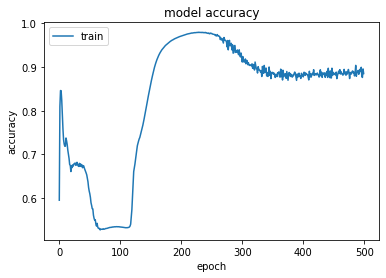

In [13]:
# plot accuracy history
# summarize history for accuracy 
plt.plot(history.history['acc'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#acc_png = './training history/' + file_name + '_accuracy.png'
#plt.savefig(acc_png)
plt.show()

In [25]:
np.set_printoptions(suppress=True)

In [19]:
x_train.shape

(65680, 9, 3)

In [48]:
num = 0

In [49]:
print(x_train[num,:,:])
print(y_train[num,:,:])

[[ 76.53510284 298.64001465  42.41149902]
 [ 76.16439819 287.62799072  43.0707016 ]
 [ 75.80950165 277.11898804  43.44910049]
 [ 75.70410156 265.83700562  43.76070023]
 [ 75.36289978 255.05999756  43.82559967]
 [ 75.04460144 245.96299744  43.2195015 ]
 [ 74.72219849 234.96800232  43.02759933]
 [ 74.42099762 225.53999329  42.43379974]
 [ 73.9108963  216.45399475  41.65539932]]
[[ 73.6289978  206.82899475  40.43310165]
 [ 73.14569855 196.58900452  39.68360138]
 [ 72.68139648 186.82699585  38.35089874]
 [ 72.03569794 179.14700317  36.31200027]
 [ 71.80599976 167.70300293  35.07360077]
 [ 71.20140076 159.83999634  32.99610138]
 [ 70.80509949 150.79400635  30.60079956]
 [ 70.23670197 142.76100159  27.95319939]
 [ 69.87650299 133.66600037  25.61359978]]


In [50]:
y_pred = model.predict(x_train[num,:,:].reshape(1,9,3), verbose=1)
print(y_pred)

1/1 [==============================] - 0s 7ms/step
[[[ 73.87105  205.78673   40.53266 ]
  [ 73.234406 196.15947   39.186577]
  [ 72.87796  186.53268   37.904804]
  [ 72.61771  177.02203   36.43546 ]
  [ 72.28131  167.63637   34.674564]
  [ 71.902374 158.38791   32.717594]
  [ 71.50011  149.2056    30.597805]
  [ 71.10336  140.1226    28.31211 ]
  [ 70.746956 131.29944   25.866669]]]


In [51]:
error = y_train[num,:,:].reshape(1,9,3)-y_pred
error

array([[[-0.24205017,  1.04226685, -0.09955978],
        [-0.08870697,  0.42953491,  0.49702454],
        [-0.19656372,  0.29431152,  0.44609451],
        [-0.58200836,  2.12496948, -0.12345886],
        [-0.47531128,  0.06663513,  0.39903641],
        [-0.70097351,  1.4520874 ,  0.27850723],
        [-0.69500732,  1.58840942,  0.00299454],
        [-0.86666107,  2.63839722, -0.35891151],
        [-0.87045288,  2.36656189, -0.25306892]]])